In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [3]:
def read_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale (adjust for color mode)
    plt.imshow(img, cmap='gray')
    plt.show()
    return np.array(img)

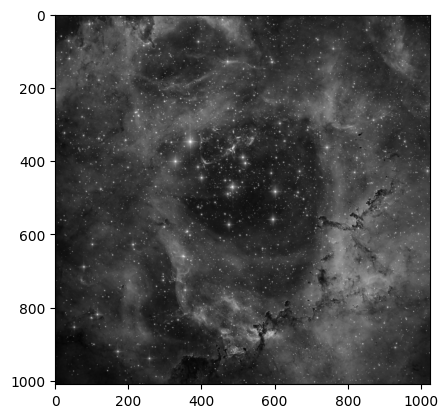

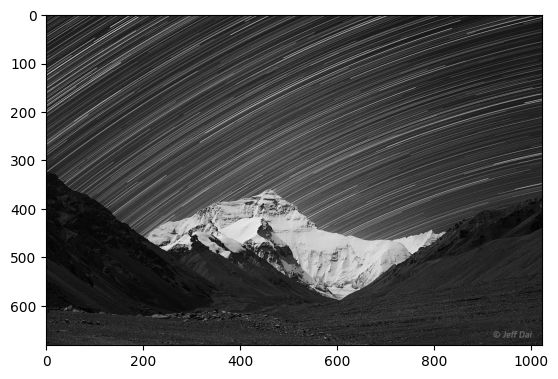

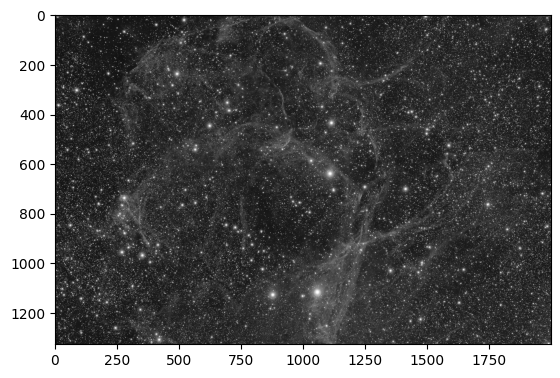

(256, 256)

In [4]:
rose = read_image('rose.png')
everest = read_image('everest.jpg')
nova = read_image('nova.jpg')
apc = mpimg.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment2/7.1.08.tiff")
aerial = mpimg.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment2/5.1.10.tiff")
aerial.shape

 NASA images used here are<br>
 rose is https://apod.nasa.gov/apod/ap240209.html<br>
 everest is https://apod.nasa.gov/apod/ap181201.html<br>
 nova is https://apod.nasa.gov/apod/ap150101.html

# 1

1

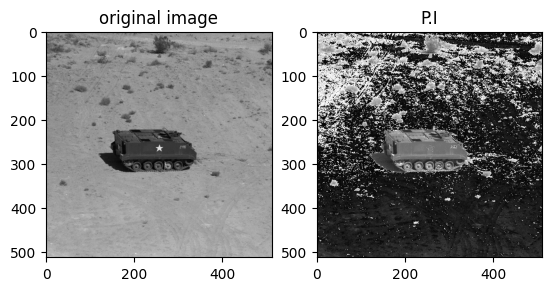

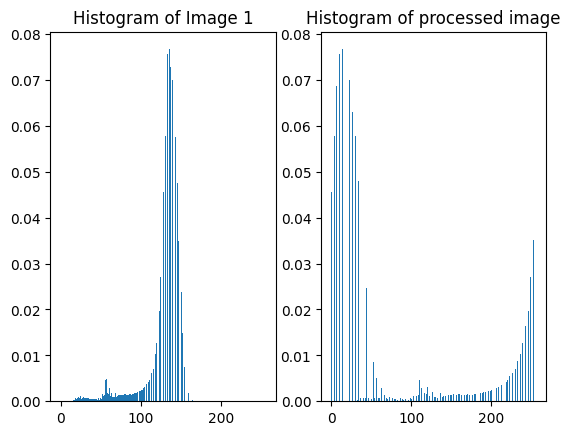

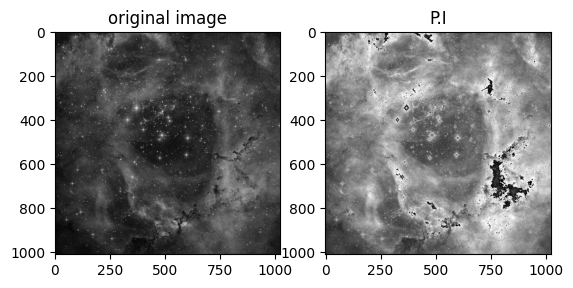

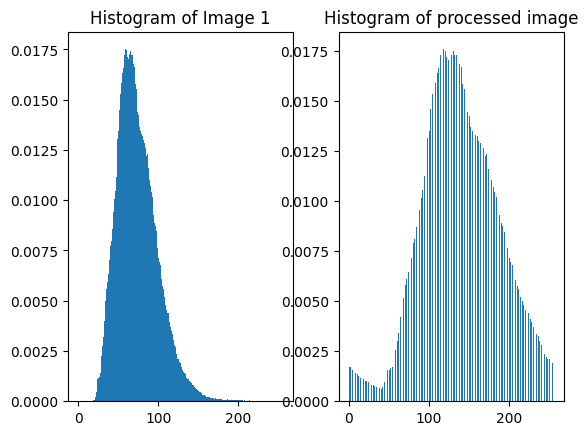

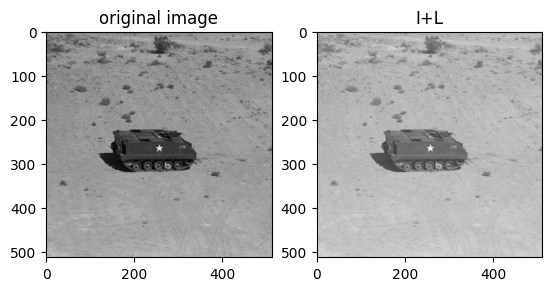

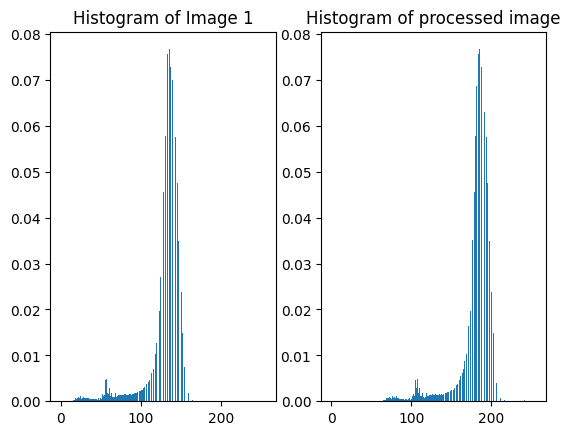

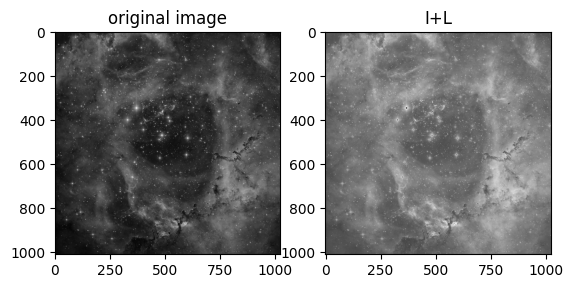

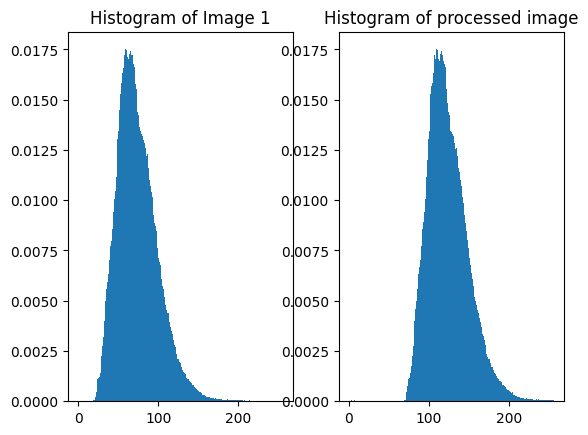

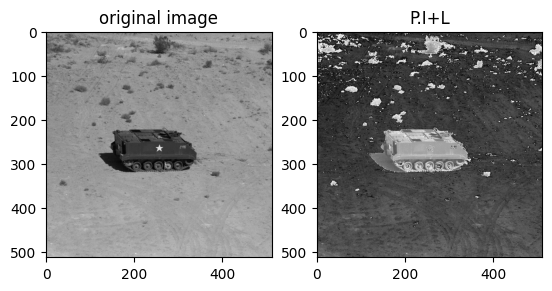

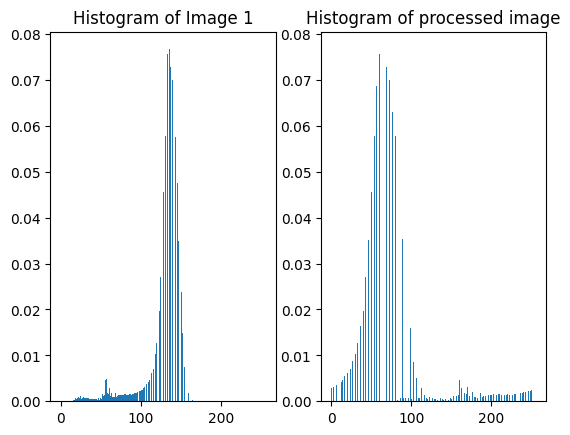

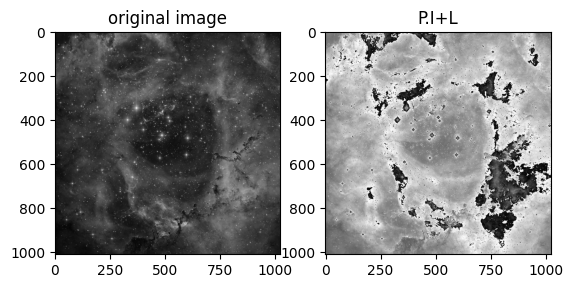

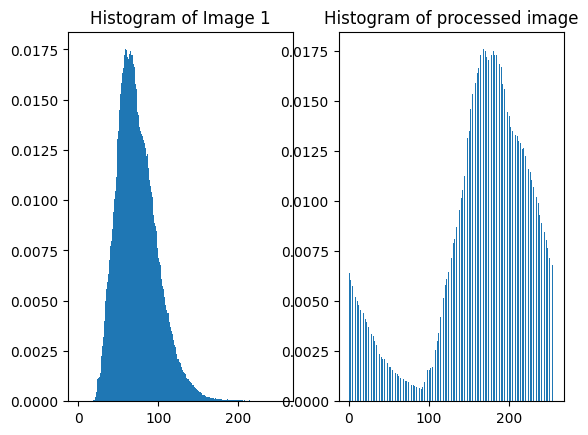

In [4]:
def point_operations(image, operation):
    height, width = image.shape
    processed_image = np.zeros_like(image)

    if operation == 'P.I':
        processed_image = image * 2  
    elif operation == 'I+L':
        processed_image = image + 50 
    elif operation == 'P.I+L':
        processed_image = image * 2 + 50 
        
        
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title("original image")
    plt.subplot(122)
    plt.imshow(processed_image , cmap='gray')
    plt.title(operation)
    plt.show()
    return processed_image

def verify_histogram_relation(image_1, image_2):
    plt.subplot(121)
    plt.hist(image_1.flatten(), bins=256, range=(0,256), density=True)
    plt.title("Histogram of Image 1")
    plt.subplot(122)
    plt.hist(image_2.flatten(), bins=256, range=(0,256), density=True)
    plt.title("Histogram of processed image")
    plt.show()
    
processed_image_PI = point_operations(apc, 'P.I')
verify_histogram_relation(apc, processed_image_PI)
processed_image_PI = point_operations(rose, 'P.I')
verify_histogram_relation(rose, processed_image_PI)

processed_image_IL = point_operations(apc, 'I+L')
verify_histogram_relation(apc, processed_image_IL)
processed_image_IL = point_operations(rose, 'I+L')
verify_histogram_relation(rose, processed_image_IL)

processed_image_PIL = point_operations(apc, 'P.I+L')
verify_histogram_relation(apc, processed_image_PIL)
processed_image_PIL = point_operations(rose, 'P.I+L')
verify_histogram_relation(rose, processed_image_PIL)


Adding a positive value to the image makes the image lighter than multiplying with some low positive value because the darkest pixel(low pixel value) doesn't change much by multiplying and we can see that if we both add and multiply we get the lightest image as mentioned

2

Min pixel value before: 12
Max pixel value before: 215
Min pixel value after: 0
Max pixel value after: 255


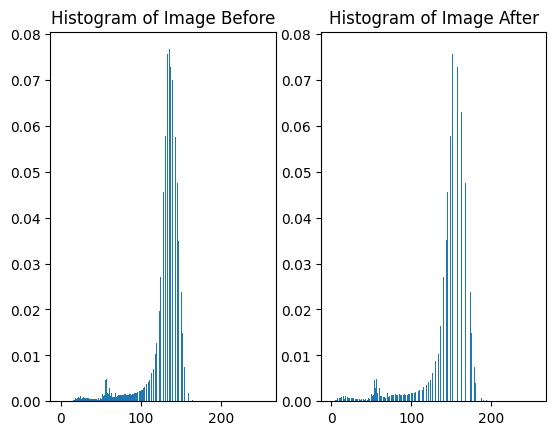

In [5]:
def full_scale_contrast_stretch(image):
    min_val = np.min(image)
    max_val = np.max(image)
    processed_image = (image - min_val) / (max_val - min_val) * 255
    processed_image = processed_image.astype(np.uint8)

    print("Min pixel value before:", min_val)
    print("Max pixel value before:", max_val)
    print("Min pixel value after:", np.min(processed_image))
    print("Max pixel value after:", np.max(processed_image))
    
    plt.subplot(121)
    plt.hist(apc.flatten(), bins=256, range=(0,256), density=True)
    plt.title("Histogram of Image Before")
    plt.subplot(122)
    plt.hist(processed_image.flatten(), bins=256, range=(0,256), density=True)
    plt.title("Histogram of Image After")
    plt.show()

    return processed_image

# Perform FSCS and plot histograms
processed_image_fscs = full_scale_contrast_stretch(apc)



we can see that after apply FSCS the minimum and maximum pixel intensities are 0 and 255

3

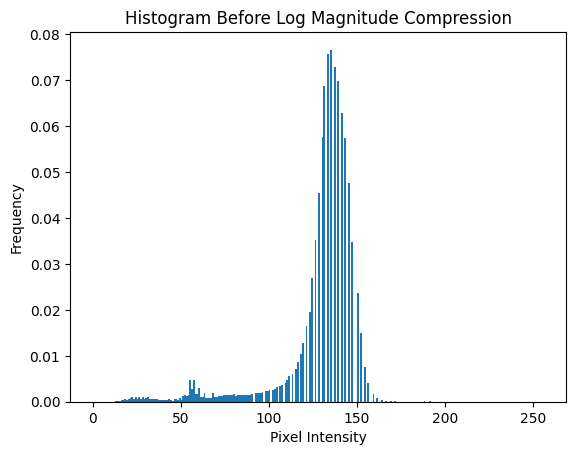

Min pixel value before: 2.564
Max pixel value before: 5.375
Min pixel value after: 0
Max pixel value after: 255


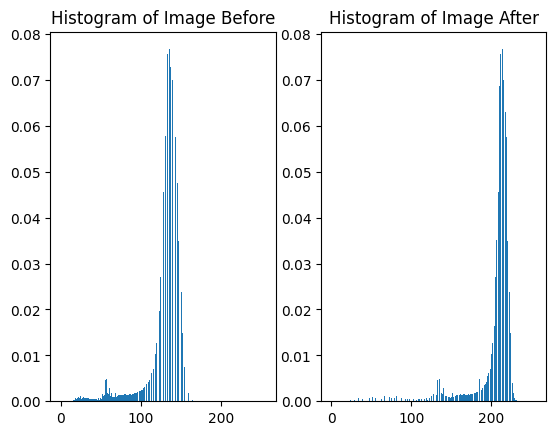

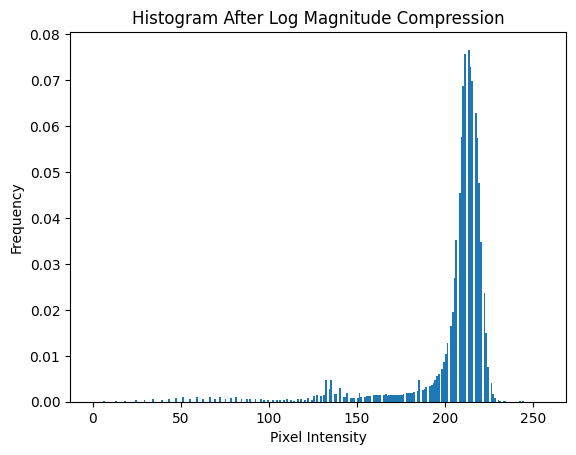

In [6]:
def log_magnitude_compression(image):
    # Apply log magnitude compression
    processed_image = np.log1p(image)  # Adjust constant as needed
    processed_image = full_scale_contrast_stretch(processed_image)

    return processed_image

def plot_histogram(image, title):
    plt.hist(image.flatten(), bins=256, range=(0,256), density=True)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(apc, 'Histogram Before Log Magnitude Compression')
processed_image = log_magnitude_compression(apc)
plot_histogram(processed_image, 'Histogram After Log Magnitude Compression')

4

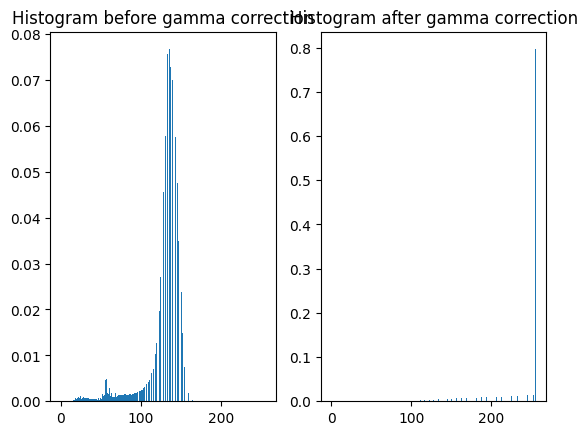

In [7]:
def gamma_correction(image, gamma):
    processed_image = image**gamma
    processed_image = np.clip(processed_image, 0, 255).astype(np.uint8)
    return processed_image

processed_image_gc = gamma_correction(rose,1.4)
plt.subplot(121)
plt.hist(apc.flatten(), bins=256, range=(0,256), density=True)
plt.title("Histogram before gamma correction")
plt.subplot(122)
plt.hist(processed_image_gc.flatten(), bins=256, range=(0,256), density=True)
plt.title("Histogram after gamma correction")
plt.show()


5

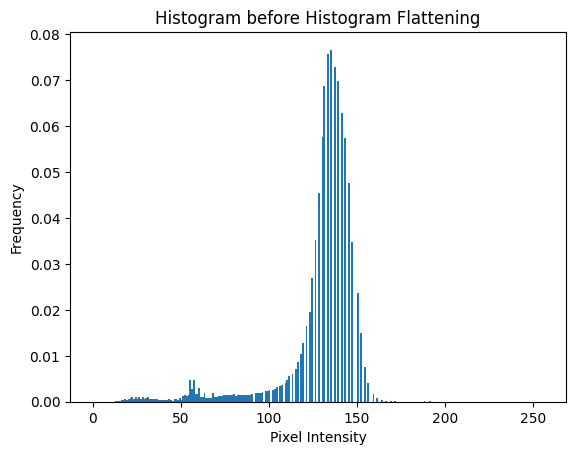

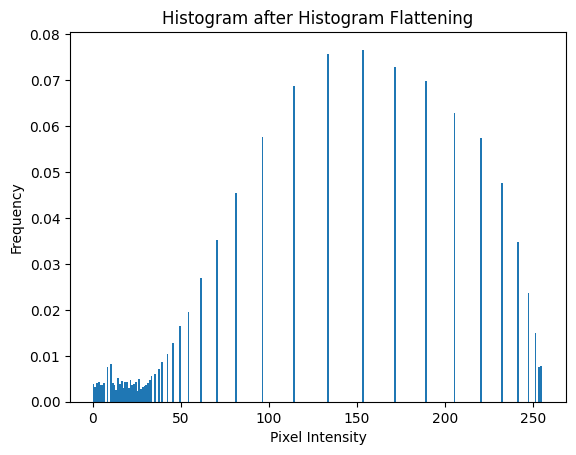

In [8]:
def histogram_flattening(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 256), density=True)
    cdf = np.cumsum(hist)
    # Normalize pixel values based on the CDF
    equalized_image = (cdf[image.astype(np.uint8)] * 255).astype(np.uint8)

    return equalized_image

def plot_histogram(image, title):
    plt.hist(image.flatten(), bins=256, range=(0,256), density=True)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()


plot_histogram(apc, 'Histogram before Histogram Flattening')
equalized_image = histogram_flattening(apc)
plot_histogram(equalized_image, 'Histogram after Histogram Flattening')


# 2

1

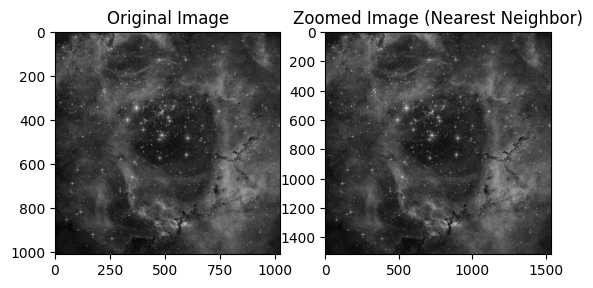

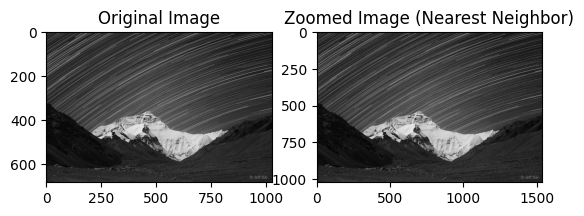

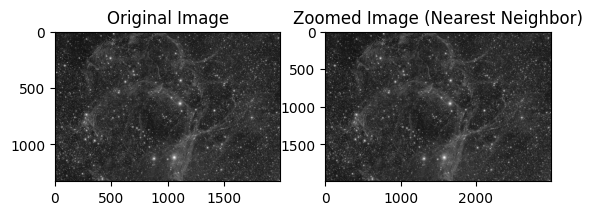

In [9]:
def zoom_nearest_neighbor(image, zoom_factor):
    height, width = image.shape
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)

    zoomed_image = np.zeros((new_height, new_width))

    for i in range(new_height):
        for j in range(new_width):
            original_i = int(i / zoom_factor)
            original_j = int(j / zoom_factor)

            # Clamp indices to stay within the original image boundaries
            original_i = min(max(original_i, 0), height - 1)
            original_j = min(max(original_j, 0), width - 1)

            zoomed_image[i, j] = image[original_i, original_j]

    # Plot the original and zoomed images
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(zoomed_image, cmap='gray')
    plt.title('Zoomed Image (Nearest Neighbor)')

    plt.show()
# Zoom factor
zoom_factor = 1.5
zoom_nearest_neighbor(rose, zoom_factor)
zoom_nearest_neighbor(everest, zoom_factor)
zoom_nearest_neighbor(nova, zoom_factor)


2

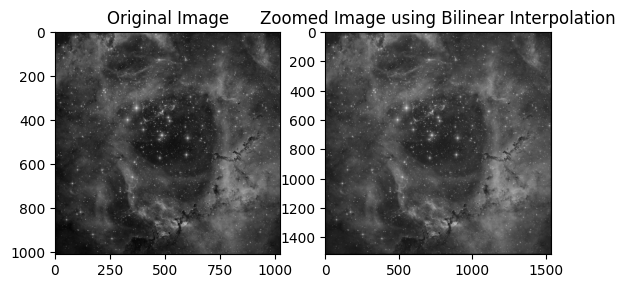

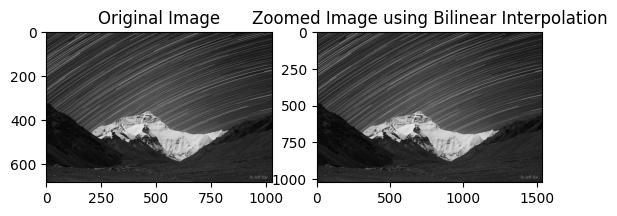

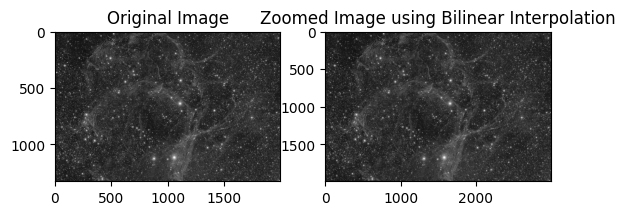

In [10]:
def bilinear_interpolation(image, zoom_factor):
    height, width = image.shape
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)

    zoomed_image = np.zeros((new_height, new_width))

    for i in range(new_height):
        for j in range(new_width):
            # Map pixel coordinates from zoomed image to original image
            original_i = i / zoom_factor
            original_j = j / zoom_factor
            i1, j1 = int(original_i), int(original_j)
            i2, j2 = i1 + 1, j1 + 1
            i1 = min(max(i1, 0), height - 1)
            i2 = min(max(i2, 0), height - 1)
            j1 = min(max(j1, 0), width - 1)
            j2 = min(max(j2, 0), width - 1)

            # Bilinear interpolation
            zoomed_image[i, j] = (i2 - original_i) * (j2 - original_j) * image[i1, j1] +(original_i - i1) * (j2 - original_j) * image[i2, j1] +(i2 - original_i) * (original_j - j1) * image[i1, j2] + (original_i - i1) * (original_j - j1) * image[i2, j2]


    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(zoomed_image, cmap='gray')
    plt.title('Zoomed Image using Bilinear Interpolation')
    plt.show()
    return zoomed_image

# Zoom factor
zoom_factor = 1.5

zoomed_image = bilinear_interpolation(rose, zoom_factor)
zoomed_image = bilinear_interpolation(everest, zoom_factor)
zoomed_image = bilinear_interpolation(nova, zoom_factor)

We can observe that the nearest neighbours method works better for sharper images than bilinear interpolation<br>
Bilinear Interpolation is taking more time as it needs to take average of 4 points for one point in output image<br>
So bilinear interpolation gives the better result compared to nearest neighbours

# 3

# 1

In [11]:
# import numpy as np

# original_image = apc
# start_row = (512 - 64) // 2
# start_col = (512 - 64) // 2
# center_region = original_image[start_row:start_row + 64, start_col:start_col + 64]
# print(center_region.shape)  
center_region = apc

In [12]:
def dft_2d(image):
    M, N = image.shape
    F = np.zeros((M, N), dtype=np.complex128)

    for u in range(M):
        for v in range(N):
            x = np.arange(M)
            y = np.arange(N)
            X, Y = np.meshgrid(x, y)
            W = np.exp(-1j * 2 * np.pi * (u * X / M + v * Y / N))
            F[u, v] = np.sum(image * W)

    return F

def idft_2d(F):
    M, N = F.shape
    f = np.zeros((M, N), dtype=np.complex128)

    for x in range(M):
        for y in range(N):
            u = np.arange(M)
            v = np.arange(N)
            U, V = np.meshgrid(u, v)
            W = np.exp(1j * 2 * np.pi * (U * x / M + V * y / N))
            f[x, y] = np.sum(F * W)

    return f / (M * N)

def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)

def display_dft(image, title):
    dft_result = dft_2d_matrix(image)
    magnitude_spectrum = np.abs(dft_result)
    phase_spectrum = np.angle(dft_result)

    # Apply logarithmic transformation to the magnitude spectrum for better visualization
    magnitude_spectrum_log = np.log(1 + magnitude_spectrum)
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 4, 1)
    display_image(image, 'Original Image')

    plt.subplot(1, 4, 2)
    display_image(magnitude_spectrum_log, 'DFT Magnitude (Log Transform)')

    plt.subplot(1, 4, 3)
    display_image(phase_spectrum, 'DFT Phase')

    plt.subplot(1, 4, 4)
    display_image(magnitude_spectrum, 'DFT Magnitude')

    plt.suptitle(title)
    plt.show()



# 2

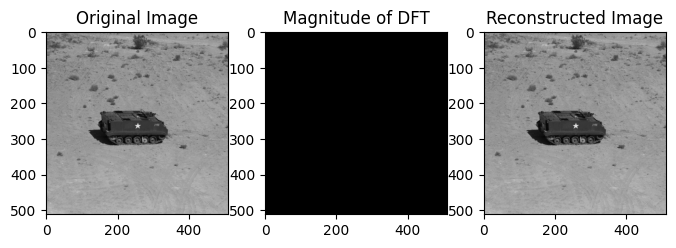

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def dft_2d_matrix(image):
    M, N = image.shape
    u = np.arange(M)
    v = np.arange(N)
    u, v = np.meshgrid(u, v, indexing='ij')

    omega_u = np.exp(-2j * np.pi / M)
    omega_v = np.exp(-2j * np.pi / N)

    matrix_u = np.vander(omega_u**u[:, 0], increasing=True)
    matrix_v = np.vander(omega_v**v[0, :], increasing=True)

    dft_result = np.dot(matrix_u, np.dot(image, matrix_v.T))
    return dft_result

def idft_2d_matrix(dft_result):
    M, N = dft_result.shape
    u = np.arange(M)
    v = np.arange(N)
    u, v = np.meshgrid(u, v, indexing='ij')

    omega_u = np.exp(2j * np.pi / M)
    omega_v = np.exp(2j * np.pi / N)

    matrix_u = np.vander(omega_u**u[:, 0], increasing=True)
    matrix_v = np.vander(omega_v**v[0, :], increasing=True)

    idft_result = (1 / (M * N)) * np.dot(matrix_u, np.dot(dft_result, matrix_v.T))
    return idft_result

# Assuming 'center_region' is your image data
gray_image = center_region

# Perform 2D DFT
dft_result = dft_2d_matrix(gray_image)

# Perform 2D IDFT
idft_result = idft_2d_matrix(dft_result)

# Display original and reconstructed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(dft_result), cmap='gray')
plt.title('Magnitude of DFT')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(idft_result), cmap='gray')
plt.title('Reconstructed Image')

plt.show()


1

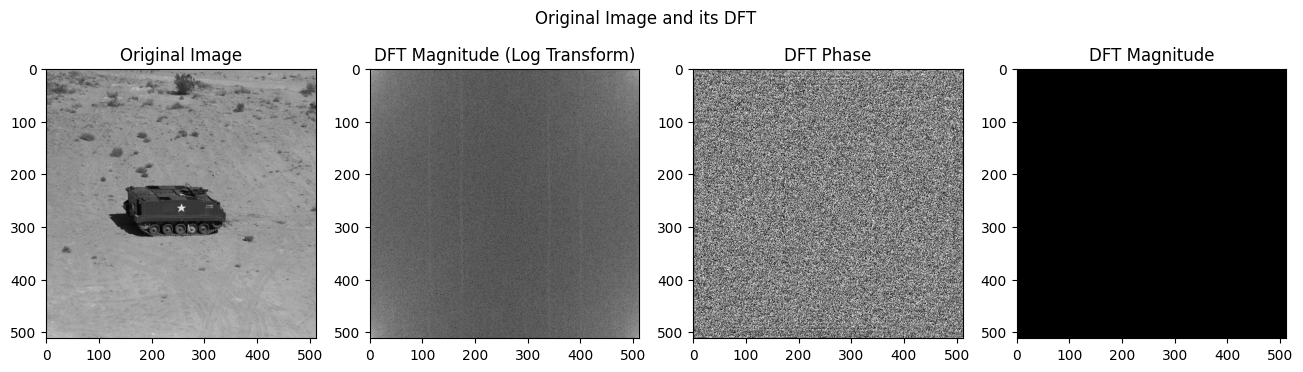

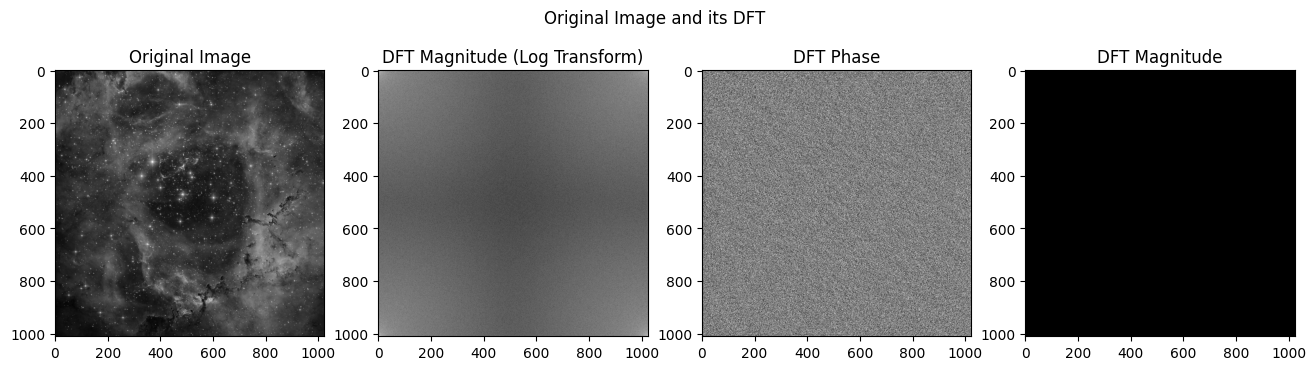

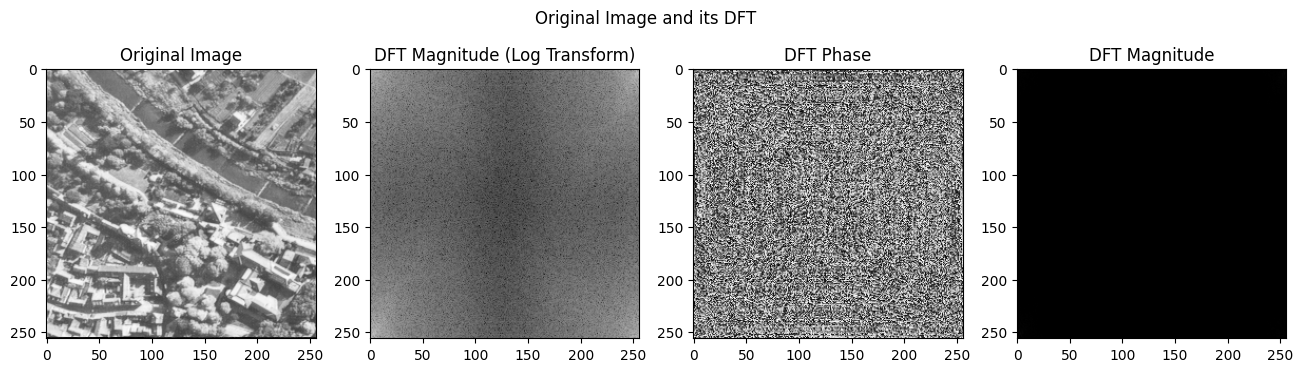

In [14]:
display_dft(center_region, 'Original Image and its DFT')
display_dft(rose, 'Original Image and its DFT')
display_dft(aerial, 'Original Image and its DFT')

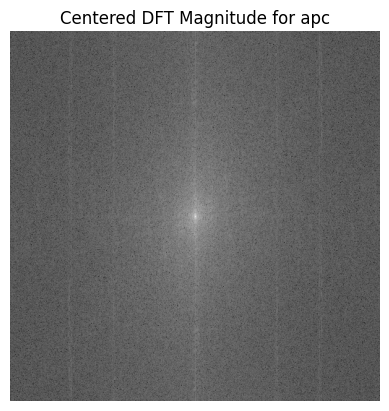

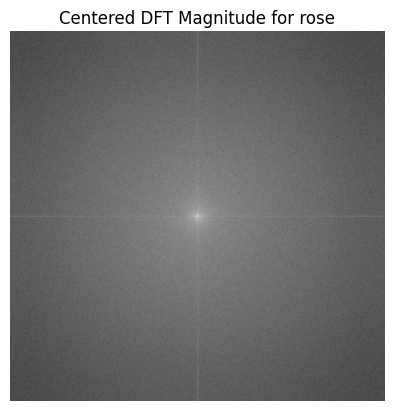

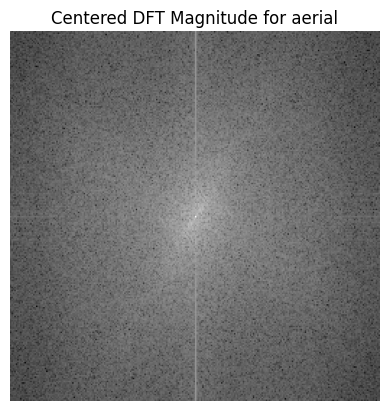

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def centered_dft(image):
    M, N = image.shape
    F = np.zeros((M, N), dtype=np.complex128)

    for u in range(M):
        for v in range(N):
            F[u, v] = (-1)**(u + v) * image[u, v]

    return dft_2d_matrix(F)

def display_magnitude_spectrum(F, title):
    magnitude_spectrum = np.abs(F)
    magnitude_spectrum_log = np.log(1 + magnitude_spectrum)

    plt.imshow(magnitude_spectrum_log, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


centered_dft_result = centered_dft(center_region)
display_magnitude_spectrum(centered_dft_result, 'Centered DFT Magnitude for apc')
centered_dft_result = centered_dft(rose)
display_magnitude_spectrum(centered_dft_result, 'Centered DFT Magnitude for rose')
centered_dft_result = centered_dft(aerial)
display_magnitude_spectrum(centered_dft_result, 'Centered DFT Magnitude for aerial')

In [16]:
dft_result = dft_2d_matrix(center_region)
idft_result = idft_2d_matrix(dft_result)

# Check if the reconstructed image is close to the original within a tolerance
tolerance = 1e-5
is_identity = np.allclose(center_region, idft_result, rtol=tolerance, atol=tolerance)

print("Is IDFT[DFT[I]] approximately equal to I?", is_identity)

Is IDFT[DFT[I]] approximately equal to I? True


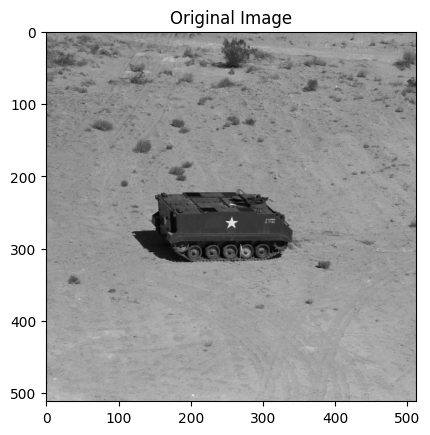

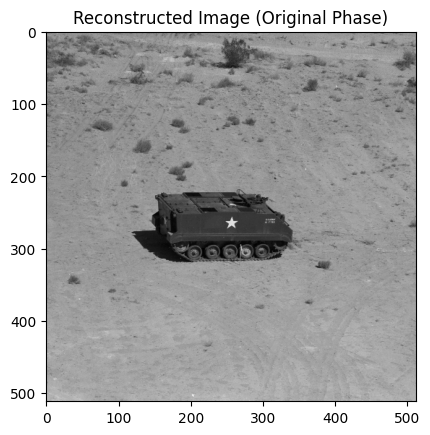

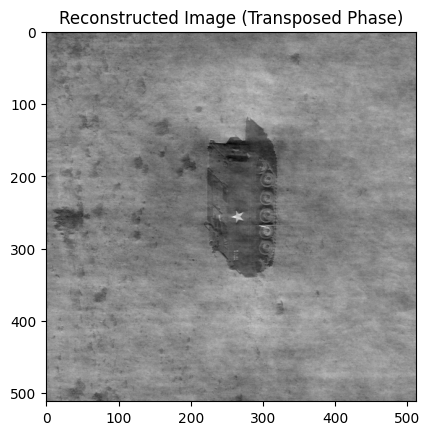

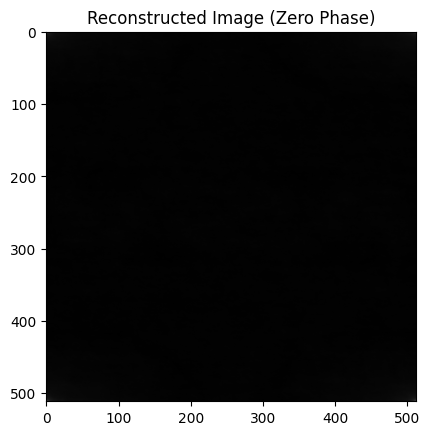

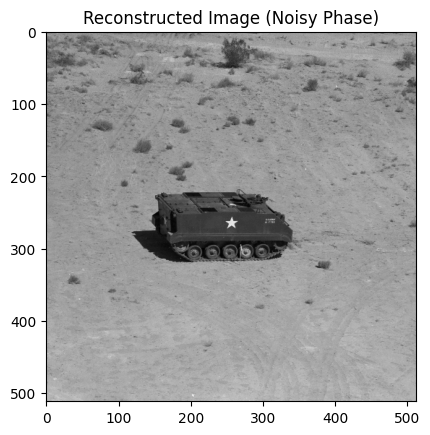

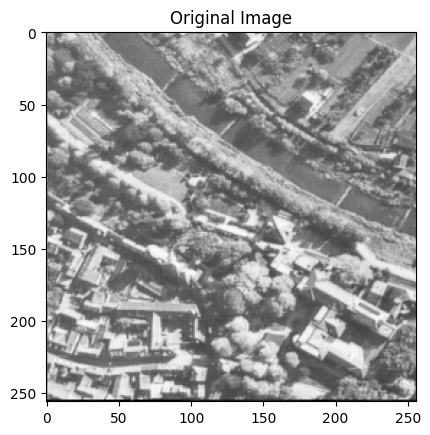

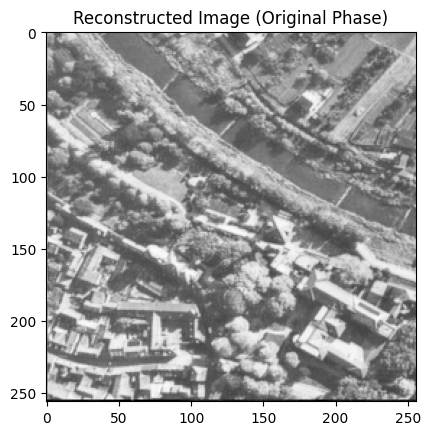

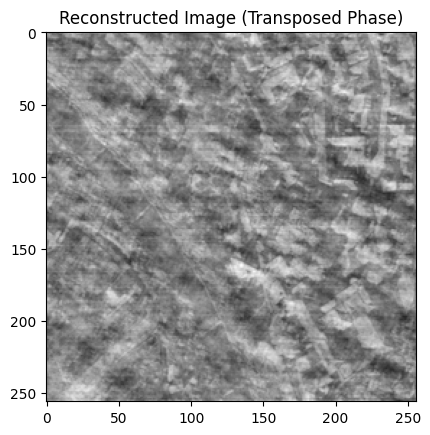

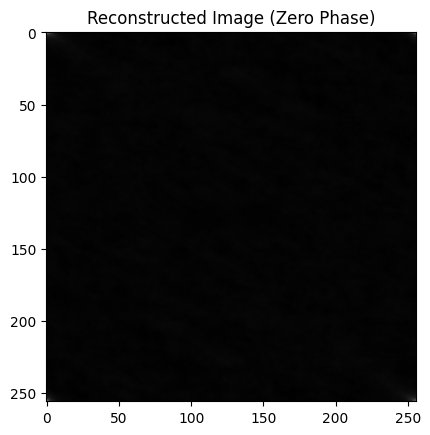

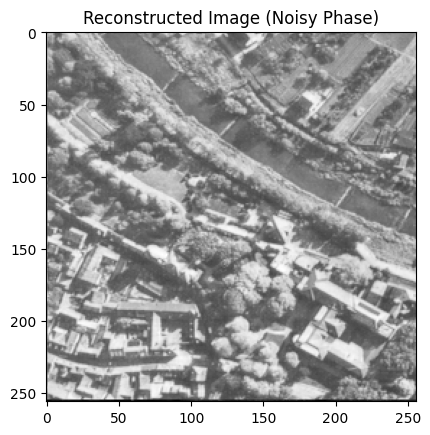

In [17]:
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()
    
def process(image):
    dft_result = dft_2d_matrix(image)
    idft_result_original = idft_2d_matrix(dft_result)

    # Transpose the phase matrix
    dft_result_transposed_phase = np.abs(dft_result) * np.exp(1j * np.angle(dft_result).T)
    idft_result_transposed_phase = idft_2d_matrix(dft_result_transposed_phase)

    # Set the phase to 0
    dft_result_zero_phase = np.abs(dft_result)
    idft_result_zero_phase = idft_2d_matrix(dft_result_zero_phase)

    # Add random noise to the phase
    noise = np.random.normal(0, 0.1, dft_result.shape)
    dft_result_noisy_phase = np.abs(dft_result) * np.exp(1j * (np.angle(dft_result) + noise))
    idft_result_noisy_phase = idft_2d_matrix(dft_result_noisy_phase)

    # Display the original and synthesized images
    display_image(image, 'Original Image')
    display_image(idft_result_original.real, 'Reconstructed Image (Original Phase)')
    display_image(idft_result_transposed_phase.real, 'Reconstructed Image (Transposed Phase)')
    display_image(idft_result_zero_phase.real, 'Reconstructed Image (Zero Phase)')
    display_image(idft_result_noisy_phase.real, 'Reconstructed Image (Noisy Phase)')
    
process(apc)
# process(rose)
process(aerial)

Here we are comparing the image and IDFT of the image after DFT, we can transposing has rotated the image, having phase as zero made the image darker, so by adding some noise we can see some parts of the image. by this we can conclude that the phase is important in DFT